- 작성자: 김명환 (Kim Myunghwan)
- 작성일: 2025년 7월 9일
- 목적: matplotlib.pyplot에서 한글 폰트가 깨지지 않도록 설정한 템플릿
- github: https://github.com/c0z0c/jupyter_hangul
- 환경: Jupyter Notebook 및 Google Colab 겸용
- 자유롭게 편집해서 사용하세요

**한글 폰트 설정 셀**

In [1]:
# v2.2.0 - 재부팅 없이 바로 완료!
# 한 번만 실행하면 모든 설정 완료
# https://github.com/c0z0c/jupyter_hangul
# 코딩 중간에 한글 깨진다 싶으면 helper.setup() 다시 호출 해줘도 됩니다.

#from urllib.request import urlretrieve; urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/master/helper_c0z0c_dev.py", "helper_c0z0c_dev.py")
from urllib.request import urlretrieve; urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/refs/heads/beta/helper_c0z0c_dev.py", "helper_c0z0c_dev.py")
import helper_c0z0c_dev as helper

🚀 Jupyter/Colab 한글 환경 설정 중... (helper v2.2.0)
✅ matplotlib 한글 폰트 설정 완료
✅ 한글 폰트 및 pandas 확장 기능 설정 완료
🎉 사용 가능: 한글 폰트, CSV 읽기, DataFrame.head_att(), 캐시 기능


In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression # 선형 회귀
from sklearn.linear_model import LinearRegression # 다중 휘귀
from sklearn.preprocessing import PolynomialFeatures # 다항 속성
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# 다중공선성 진단용
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print("✅ statsmodels 라이브러리 로드 완료")
except ImportError:
    print("⚠️ statsmodels 라이브러리가 설치되지 않았습니다.")
    print("설치 명령: !pip install statsmodels")


✅ statsmodels 라이브러리 로드 완료


### 1. 결정 트리(Decision Tree)의 장점과 단점

#### 장점
- **이해와 해석이 쉬움**: 트리 구조로 시각화가 가능해, 의사결정 과정을 쉽게 설명할 수 있습니다.
- **전처리 요구가 적음**: 데이터의 스케일링이나 정규화가 필요 없습니다.
- **범주형/연속형 모두 처리 가능**: 입력 변수로 범주형, 연속형 모두 사용 가능합니다.
- **비선형 관계도 모델링 가능**: 변수 간의 복잡한 비선형 관계도 잘 포착합니다.
- **결측치에 강함**: 일부 구현체는 결측값을 자동으로 처리할 수 있습니다.

#### 단점
- **과적합(Overfitting) 위험**: 트리가 너무 깊어지면 학습 데이터에 과적합될 수 있습니다.
- **불안정성**: 데이터가 조금만 바뀌어도 트리 구조가 크게 달라질 수 있습니다.
- **예측 성능 한계**: 단일 결정 트리는 복잡한 패턴을 잘 잡지 못해 성능이 떨어질 수 있습니다.
- **계단식 예측**: 연속형 변수 예측 시, 예측값이 계단 형태로 나와 부드럽지 않습니다.


아래는 `DecisionTreeClassifier`의 주요 하이퍼파라미터

---

### 주요 하이퍼파라미터 상세 설명 및 값 예시

| 파라미터명 | 기본값 | 설명 및 값 예시 |
|---|---|---|
| **criterion** | `"gini"` | 분할 품질 평가 기준.<br> - `"gini"`: 지니 불순도(기본값, 빠르고 일반적)<br> - `"entropy"`: 정보 이득(엔트로피, 정보이론 기반)<br> - `"log_loss"`: 로그 손실(확률 예측, scikit-learn 1.1+) |
| **splitter** | `"best"` | 분할 방식.<br> - `"best"`: 최적 분할(일반적)<br> - `"random"`: 무작위 분할(앙상블 등에서 다양성 확보용) |
| **max_depth** | `None` | 트리 최대 깊이.<br> - `None`: 리프 노드가 순수해질 때까지 분할<br> - `3`, `5` 등: 트리 깊이 제한(과적합 방지, 예: `max_depth=3`) |
| **min_samples_split** | `2` | 내부 노드 분할 최소 샘플 수.<br> - `2`: 기본값(최소 2개 샘플로 분할)<br> - `10`: 10개 이상일 때만 분할<br> - `0.1`: 전체 샘플의 10% 이상일 때만 분할 |
| **min_samples_leaf** | `1` | 리프 노드 최소 샘플 수.<br> - `1`: 기본값<br> - `5`: 리프 노드에 최소 5개 샘플 필요(과적합 방지) |
| **min_weight_fraction_leaf** | `0.0` | 리프 노드 최소 가중치 샘플 비율.<br> - `0.0`: 제한 없음<br> - `0.05`: 전체 가중치의 5% 이상 필요(샘플 가중치 사용 시) |
| **max_features** | `None` | 분할에 사용할 최대 특성 수.<br> - `None`: 모든 특성 사용<br> - `"sqrt"`: 특성 수의 제곱근(예: 16개면 4개)<br> - `"log2"`: 특성 수의 로그2(예: 16개면 4개)<br> - `3`: 3개 특성만 사용<br> - `0.5`: 전체 특성의 50% 사용 |
| **random_state** | `None` | 난수 시드(결과 재현성).<br> - `42`, `0` 등 임의의 정수 |
| **max_leaf_nodes** | `None` | 리프 노드 최대 개수.<br> - `None`: 제한 없음<br> - `10`: 최대 10개 리프 노드(트리 단순화) |
| **min_impurity_decrease** | `0.0` | 분할 허용 최소 불순도 감소량.<br> - `0.0`: 제한 없음<br> - `0.01`: 불순도 0.01 이상 감소 시만 분할 |
| **class_weight** | `None` | 클래스별 가중치.<br> - `None`: 가중치 없음<br> - `"balanced"`: 자동으로 클래스 불균형 보정<br> - `{0:1, 1:3}`: 1번 클래스에 3배 가중치 |
| **ccp_alpha** | `0.0` | 비용-복잡도 가지치기 파라미터.<br> - `0.0`: 가지치기 안 함<br> - `0.01`: 값이 커질수록 더 많이 가지치기(트리 단순화) |



아래는 `DecisionTreeClassifier`의 `criterion` 파라미터에서 사용하는 `"gini"`, `"entropy"`, `"log_loss"`의 의미와 차이점 설명입니다.

---

### 1. gini (지니 불순도)
- **정의**: 노드에 있는 샘플들이 얼마나 섞여 있는지(불순도)를 측정하는 지표.
- **수식**:  
  $$ Gini = 1 - \sum_{i=1}^{n} p_i^2 $$
  여기서 \( p_i \)는 클래스 \( i \)의 비율.
- **특징**:  
  - 값이 0이면 완전히 순수(한 클래스만 존재).
  - 값이 클수록 여러 클래스가 섞여 있음.
  - 계산이 빠르고, 실무에서 가장 많이 사용.

---

### 2. entropy (엔트로피, 정보 이득)
- **정의**: 정보이론에서 유래한 불순도 측정 지표. 노드의 불확실성(혼잡도)을 나타냄.
- **수식**:  
  $$ Entropy = -\sum_{i=1}^{n} p_i \log_2 p_i $$
- **특징**:  
  - 값이 0이면 완전히 순수.
  - 값이 클수록 불확실성(여러 클래스가 섞임)이 큼.
  - 계산이 `gini`보다 약간 느릴 수 있으나, 해석적으로 정보이득(Information Gain)과 연결됨.

---

### 3. log_loss (로그 손실)
- **정의**: 분류 확률 예측의 품질을 평가하는 지표. 예측 확률이 실제 정답과 얼마나 가까운지 측정.
- **수식**:  
  $$ Log\ Loss = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} y_{ij} \log(p_{ij}) $$
  - \( y_{ij} \): 실제 정답(원-핫 인코딩)
  - \( p_{ij} \): 예측 확률
- **특징**:  
  - 확률 예측의 품질이 중요할 때 사용.
  - scikit-learn 1.1 이상에서 지원.
  - 값이 작을수록 예측이 정확함.

---

#### 요약
- **gini**: 빠르고 실무에서 가장 많이 사용, 불순도 기준.
- **entropy**: 정보이득 기준, 해석적으로 명확.
- **log_loss**: 확률 예측의 품질을 평가, 확률 예측이 중요한 경우 사용.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion='entropy',         # 엔트로피 기준
    splitter='best',             # 최적 분할
    max_depth=4,                 # 최대 깊이 4
    min_samples_split=5,         # 최소 5개 샘플로 분할
    min_samples_leaf=2,          # 리프 노드 최소 2개 샘플
    max_features='sqrt',         # 특성 수의 제곱근만 사용
    random_state=42,             # 시드 고정
    max_leaf_nodes=10,           # 최대 10개 리프 노드
    min_impurity_decrease=0.01,  # 불순도 0.01 이상 감소 시 분할
    class_weight='balanced',     # 자동 가중치
    ccp_alpha=0.01               # 가지치기 강도
)

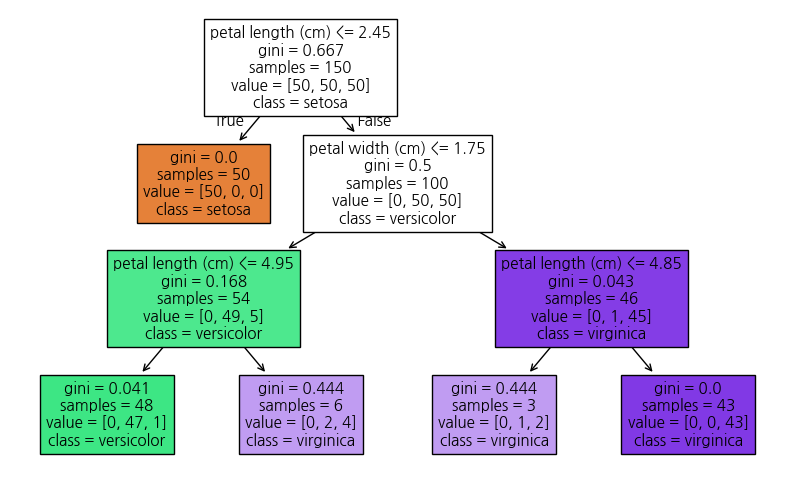

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

### 1. 트리 분할 과정

#### (1) 루트 노드  
- **조건:** `petal length (cm) <= 2.45`  
- **gini = 0.667**  
- **samples = 150**  
- **value = [50, 50, 50]**  
- **class = setosa**  
→ 전체 데이터(150개)를 한 노드에 모아놓은 상태.  
→ gini 계산:  
  $$ Gini = 1 - (1/3)^2 - (1/3)^2 - (1/3)^2 = 1 - 3 \times (1/9) = 0.667 $$

#### (2) 첫 번째 분할  
- **True(왼쪽):** `petal length <= 2.45`  
  - **gini = 0.0, samples = 50, value = [50, 0, 0], class = setosa**  
  - 모두 setosa이므로 gini=0 (완전 순수)
- **False(오른쪽):** `petal length > 2.45`  
  - **gini = 0.5, samples = 100, value = [0, 50, 50], class = versicolor**  
  - versicolor와 virginica가 50:50으로 섞여 있음  
  - gini 계산:  
    $$ Gini = 1 - (0.5)^2 - (0.5)^2 = 1 - 0.25 - 0.25 = 0.5 $$

#### (3) 두 번째 분할 (오른쪽 노드)  
- **조건:** `petal width <= 1.75`  
- **왼쪽:**  
  - **gini = 0.168, samples = 54, value = [0, 49, 5], class = versicolor**  
  - 대부분 versicolor, 일부 virginica  
  - gini 계산:  
    $$ Gini = 1 - (49/54)^2 - (5/54)^2 \approx 1 - 0.823 - 0.009 = 0.168 $$
- **오른쪽:**  
  - **gini = 0.043, samples = 46, value = [0, 1, 45], class = virginica**  
  - 거의 모두 virginica  
  - gini 계산:  
    $$ Gini = 1 - (1/46)^2 - (45/46)^2 \approx 1 - 0.0005 - 0.956 = 0.043 $$

#### (4) 추가 분할  
- **왼쪽(versicolor/virginica 혼합):**  
  - `petal length <= 4.95`로 분할  
  - **왼쪽:** gini=0.041, samples=48, value=[0,47,1], class=versicolor (거의 순수)  
  - **오른쪽:** gini=0.444, samples=6, value=[0,2,4], class=virginica (혼합)
- **오른쪽(virginica 혼합):**  
  - `petal length <= 4.85`로 분할  
  - **왼쪽:** gini=0.444, samples=3, value=[0,1,2], class=virginica  
  - **오른쪽:** gini=0.0, samples=43, value=[0,0,43], class=virginica (완전 순수)

---

### 2. 왜 이렇게 분할되는가?

- **분할 기준:**  
  각 노드에서 gini(불순도)가 가장 크게 감소하는 특성/임계값을 선택합니다.
- **목표:**  
  각 리프 노드가 최대한 한 클래스만 포함하도록(불순도 최소화) 분할합니다.
- **계산:**  
  각 분할마다 왼쪽/오른쪽 노드의 gini를 계산하고, 전체 불순도 감소량이 가장 큰 분할을 선택합니다.

---

### 3. 요약

- 트리는 각 분할마다 불순도(여기선 gini)를 최소화하는 방향으로 특성과 임계값을 선택합니다.
- 리프 노드의 gini가 0에 가까울수록 한 클래스만 남게 됩니다.
- 위 트리는 Iris 데이터의 특성상, 꽃잎 길이/너비로 setosa, versicolor, virginica를 잘 구분할 수 있음을 보여줍니다.



---

### 2. 부스팅(Boosting) 앙상블 기법

#### 특징
- **약한 학습기(weak learner)를 순차적으로 학습**시켜, 이전 모델이 틀린 부분을 다음 모델이 보완하도록 만듭니다.
- **가중치 조정**: 오답에 더 많은 가중치를 두어 점점 어려운 샘플에 집중합니다.
- **과적합 방지**: 적절한 파라미터 조정 시 과적합을 줄일 수 있습니다.
- **높은 예측 성능**: 단일 모델보다 일반적으로 더 좋은 성능을 보입니다.

#### AdaBoost 외의 대표적 부스팅 모델

| 모델명         | 특징 및 장단점 |
|----------------|---------------|
| **Gradient Boosting (GBM)** | - 잔여 오차(gradient)를 줄이도록 다음 트리를 학습<br>- 과적합 위험 있음, 느린 학습 속도<br>- 하이퍼파라미터 튜닝 필요 |
| **XGBoost**    | - GBM의 개선판, 속도와 성능 모두 우수<br>- 결측치 자동 처리, 병렬 처리 지원<br>- 복잡한 파라미터, 과적합 주의 |
| **LightGBM**   | - XGBoost보다 더 빠르고 메모리 효율적<br>- 대용량 데이터에 적합, 카테고리형 변수 자동 처리<br>- 작은 데이터셋에서는 과적합 가능성 |
| **CatBoost**   | - 범주형 변수 자동 인코딩<br>- 적은 튜닝으로도 좋은 성능<br>- 설치 용량이 크고, 학습 속도는 LightGBM보다 느릴 수 있음 |

#### 샘플 코드 (XGBoost)


In [4]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("정확도:", accuracy_score(y_test, y_pred))

정확도: 1.0




### 3. 주성분 분석(PCA) vs 요인 분석(FA)

| 구분 | 주성분 분석(PCA) | 요인 분석(FA) |
|------|------------------|--------------|
| 목적 | 데이터의 분산을 최대한 보존하는 축(주성분) 찾기 | 관측 변수들의 공통된 잠재 요인(인자) 추정 |
| 수학적 방법 | 공분산 행렬의 고유값 분해 | 공분산 행렬을 공통 요인과 특이 요인으로 분해 |
| 해석 | 주성분은 데이터의 최대 분산 방향 | 요인은 변수들 간의 상관관계의 원인 |
| 사용 예 | 차원 축소, 시각화 | 심리학, 사회과학 등에서 잠재 변수 추정 |
| 단점 | 해석이 어려울 수 있음 | 요인 수 결정이 어려움, 가정이 많음 |

#### PCA


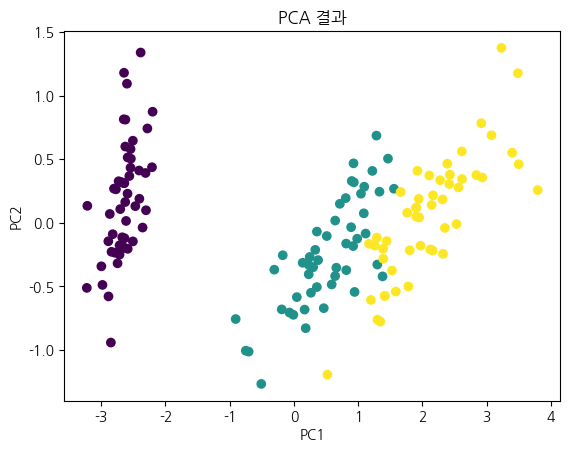

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 결과')
plt.show()

#### 요인 분석


In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import pandas as pd

X, _ = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df)
print("공통성:\n", fa.get_communalities())
print("요인 적재량:\n", fa.loadings_)

공통성:
 [0.81249138 0.99520493 1.01060002 0.90338342]
요인 적재량:
 [[ 0.90120548  0.01789008]
 [-0.15041281  0.98619517]
 [ 0.96415345 -0.28461929]
 [ 0.92140124 -0.23324486]]
